# Discliamier

*  https://www.youtube.com/watch?v=6GUZXDef2U0&ab_channel=DerekBanas

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [20]:
# SNS built-in dataset
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# DataFrame

In [21]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


# Distribution Plot

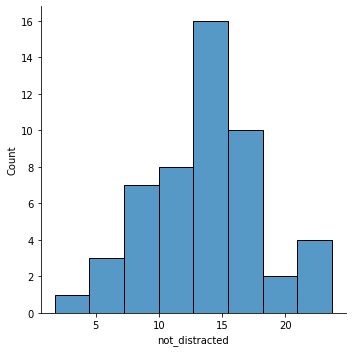

In [27]:
sns.displot(crash_df['not_distracted'])

## with KDE

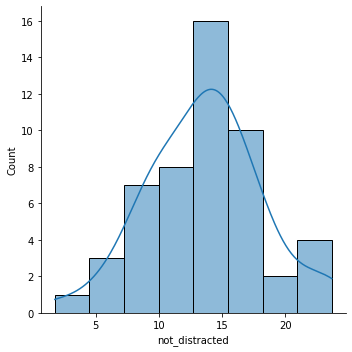

In [29]:
sns.displot(crash_df['not_distracted'], kde = 'True')


# Joint Plot

## with Regression

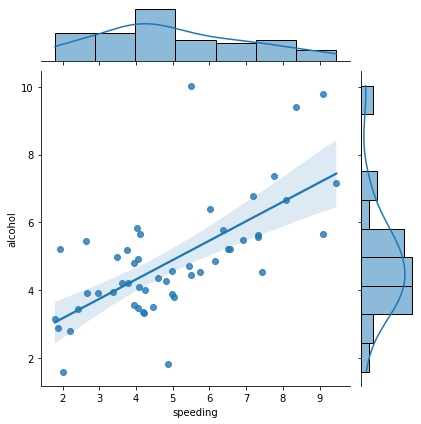

In [23]:
sns.jointplot(x='speeding', 
              y='alcohol', 
              data=crash_df,
              kind='reg'
              )

## with KDE

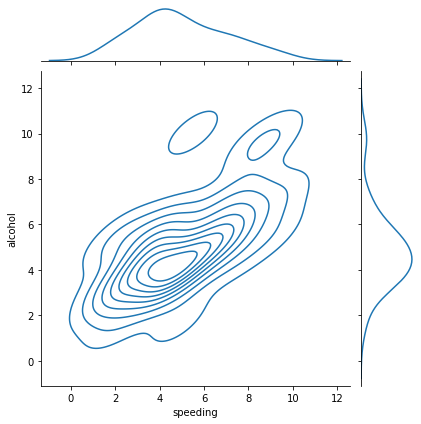

In [30]:
sns.jointplot(x='speeding', 
              y='alcohol', 
              data=crash_df,
              kind='kde'
              )

## in hex

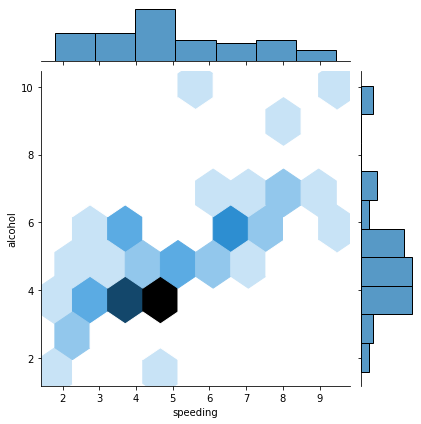

In [31]:
sns.jointplot(x='speeding', 
              y='alcohol', 
              data=crash_df,
              kind='hex'
              )

# Pair Plots  

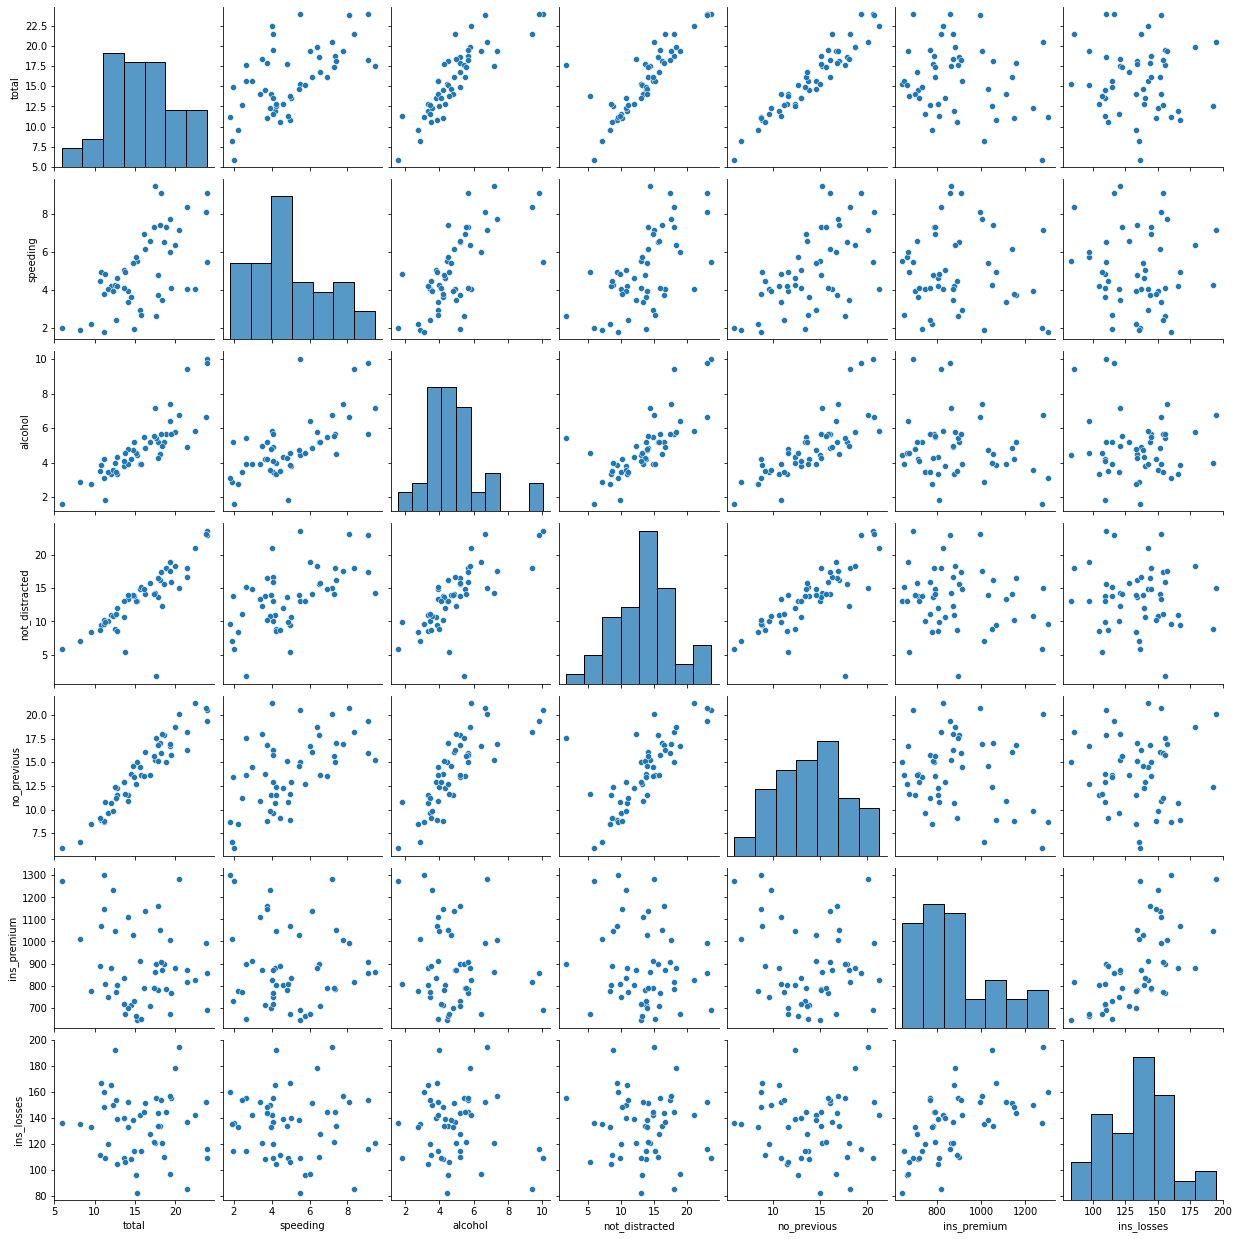

In [32]:
sns.pairplot(crash_df)

## with hue

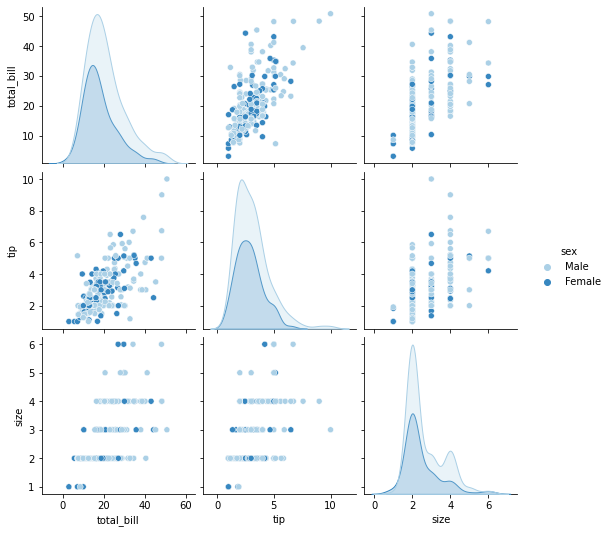

In [34]:
tips_df = sns.load_dataset('tips')

sns.pairplot(tips_df, hue='sex', palette='Blues')

# Rug Plot

<Axes: xlabel='tip'>

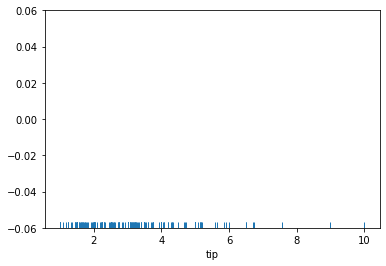

In [35]:
sns.rugplot(tips_df['tip'])

# Styling

<Figure size 576x288 with 0 Axes>

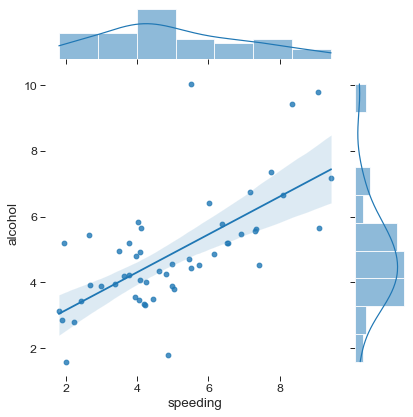

In [45]:
# style : dark, white, darkgrid, ticks
sns.set_style('ticks')

sns.set_context('paper', #paper, talk, poster
                 font_scale = 1.4)

plt.figure(figsize=(8,4)) # change size
sns.jointplot(crash_df, x='speeding', y='alcohol', kind = 'reg')

sns.despine(left=True,
            top=  True,
            bottom= True
            )

# Categorical Plots

## Bar Plots

<Axes: xlabel='sex', ylabel='total_bill'>

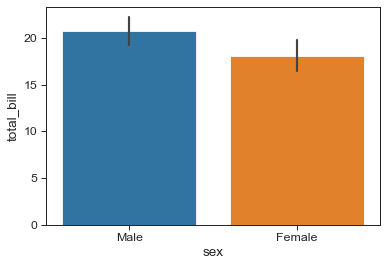

In [46]:
sns.barplot(x='sex', 
            y='total_bill', 
            data=tips_df,
            estimator = np.mean  #median, sum ... 
            )

## Count Plot

<Axes: xlabel='sex', ylabel='count'>

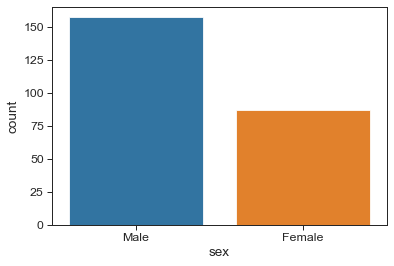

In [47]:
sns.countplot(x='sex', data=tips_df)

## Box Plot

* shows quatile and median, standard deviaiton

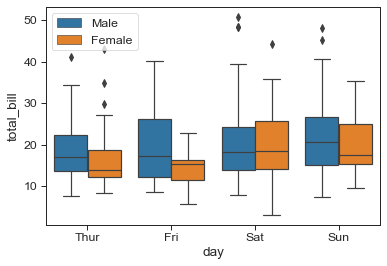

In [49]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0) # change legencd location 

## Violin Plot

* box + kde

<Axes: xlabel='day', ylabel='total_bill'>

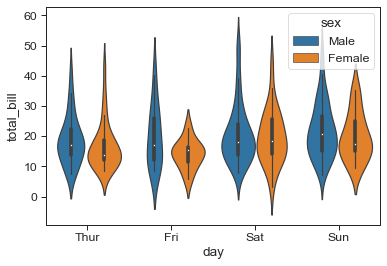

In [50]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

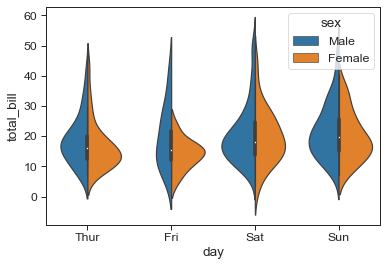

In [51]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

## Strip Plot

<Axes: xlabel='day', ylabel='total_bill'>

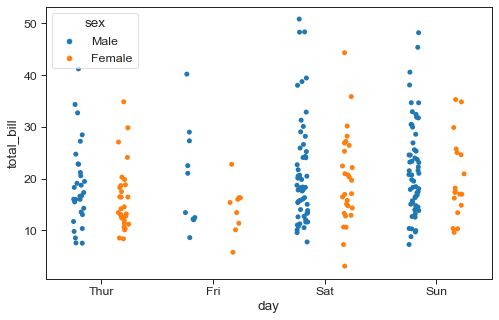

In [56]:
plt.figure(figsize=(8,5))

sns.stripplot(x='day',
            y='total_bill',
            data=tips_df, 
            jitter=True,
            hue='sex',
            dodge=True)

# Swarm Plot

<Axes: xlabel='day', ylabel='total_bill'>

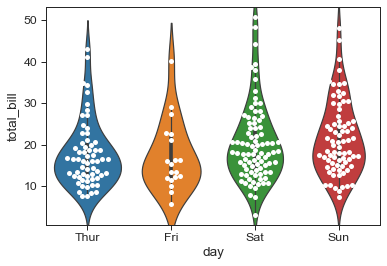

In [59]:
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color ='white')

## Palettes

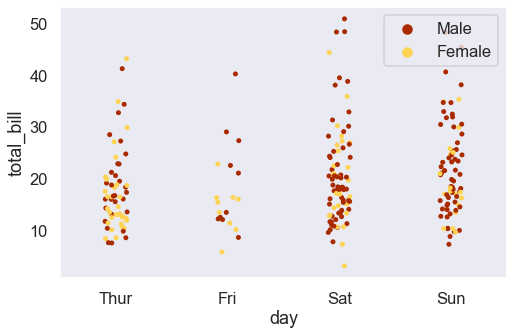

In [62]:
plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day',
            y='total_bill',
            data=tips_df, 
            hue='sex',
            palette='afmhot' #https://matplotlib.org/stable/tutorials/colors/colormaps.html
            )
#upper right =1, upper left:2, lower left:3
plt.legend(loc=1)

# Heatmaps

In [67]:
crash_df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<Axes: >

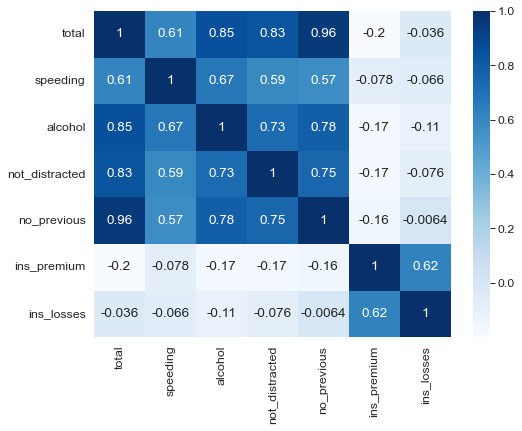

In [73]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
crash_mx = crash_df.drop(columns='abbrev').corr()

sns.heatmap(crash_mx, annot=True, cmap = 'Blues')

<Axes: xlabel='year', ylabel='month'>

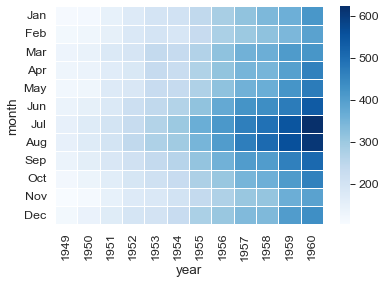

In [75]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index='month', columns='year', values='passengers')

sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

## Cluster Map

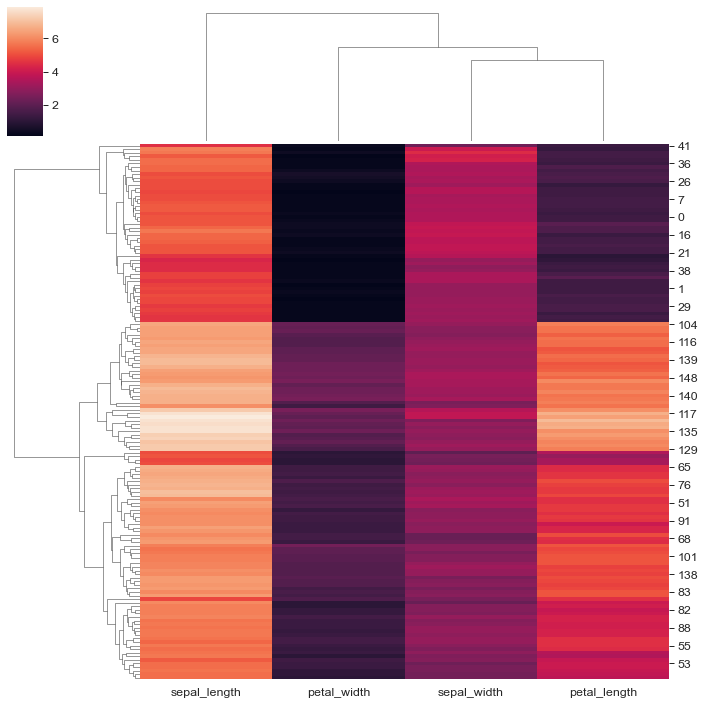

In [76]:
iris = sns.load_dataset('iris')
species = iris.pop('species')

sns.clustermap(iris)

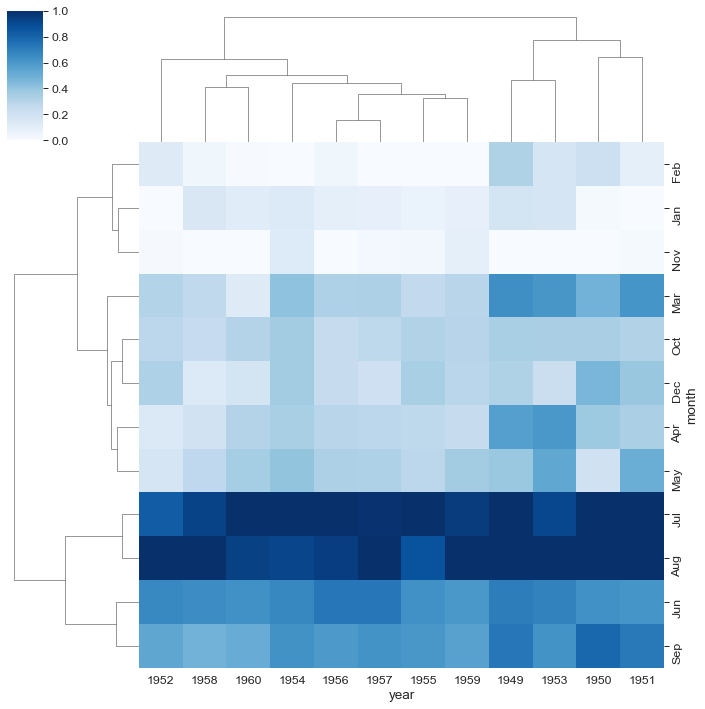

In [77]:
sns.clustermap(flights, cmap='Blues', standard_scale=1)

## PairGrid

In [79]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


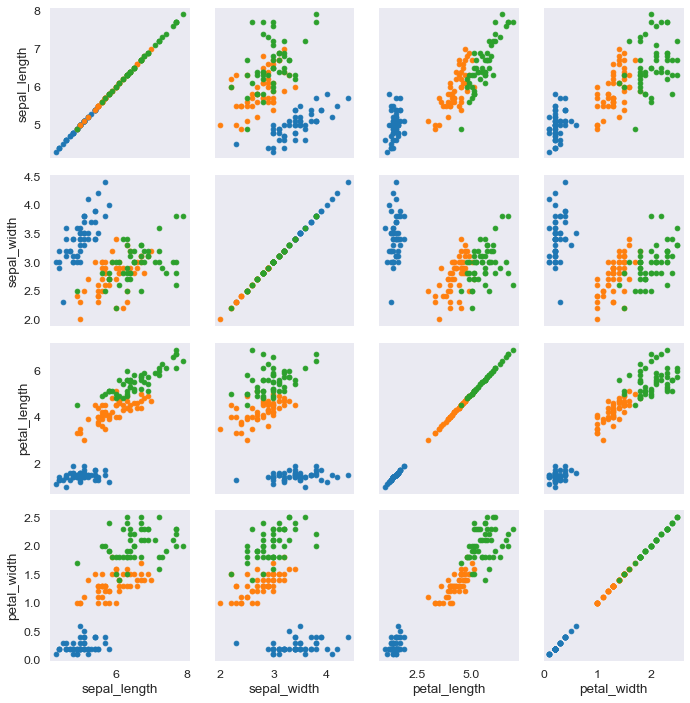

In [83]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map(plt.scatter)

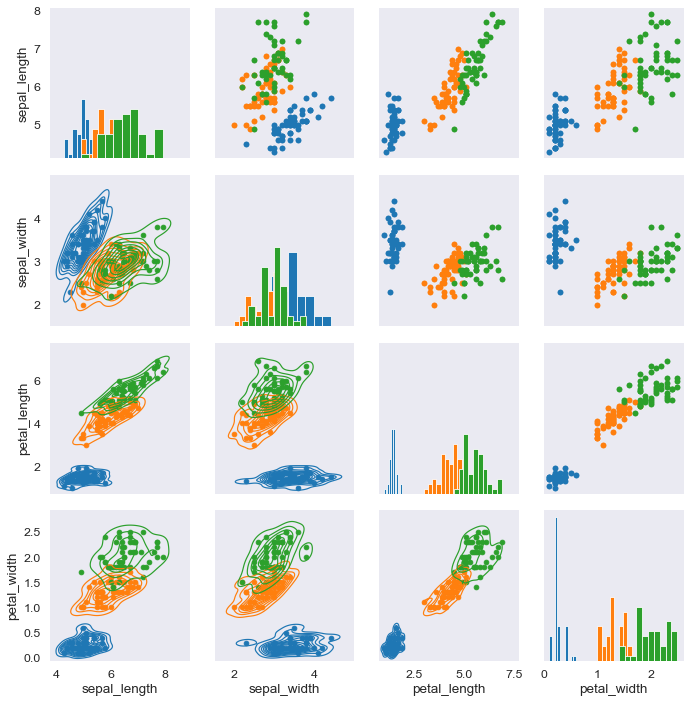

In [86]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)

iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

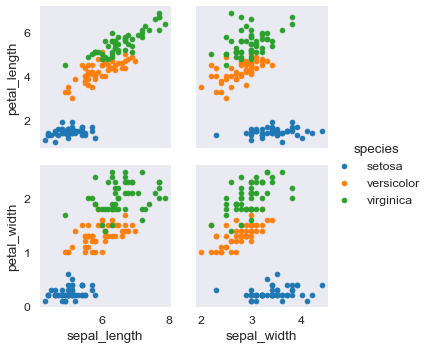

In [89]:
iris = sns.load_dataset('iris')
#iris_g = sns.PairGrid(iris, hue='species')
#iris_g.map_diag(plt.hist)
#iris_g.map_offdiag(plt.scatter)

#iris_g.map_upper(plt.scatter)
#iris_g.map_lower(sns.kdeplot)
iris_g = sns.PairGrid(iris,
                    hue='species',
                    x_vars=['sepal_length', 'sepal_width'],
                    y_vars=['petal_length', 'petal_width']
                    )

iris_g.map(plt.scatter)
iris_g.add_legend()

## Facet Grid

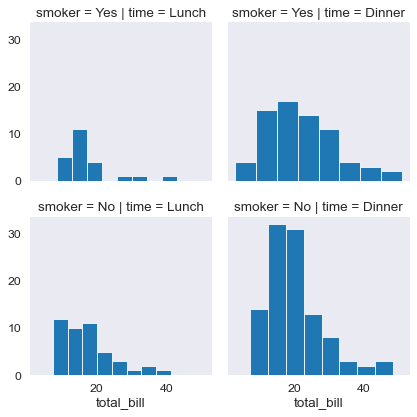

In [91]:
tips_fg = sns.FacetGrid(tips_df,
                        col='time',
                        row='smoker')

tips_fg.map(plt.hist, 'total_bill', bins=8)

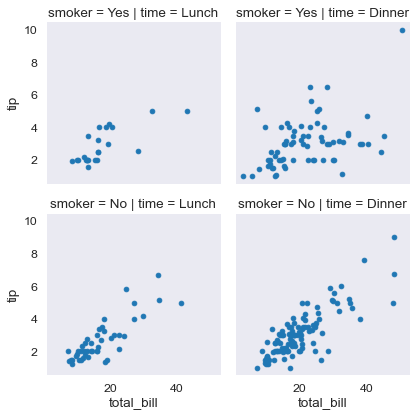

In [92]:
tips_fg = sns.FacetGrid(tips_df,
                        col='time',
                        row='smoker')

tips_fg.map(plt.scatter, 'total_bill', 'tip')

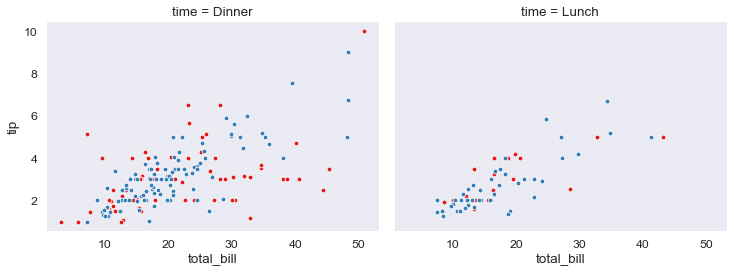

In [95]:
tips_fg = sns.FacetGrid(tips_df,
                        col='time',
                        hue='smoker',
                        height=4,
                        aspect=1.3,
                        col_order=['Dinner','Lunch'],
                        palette='Set1'
                        )

tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')


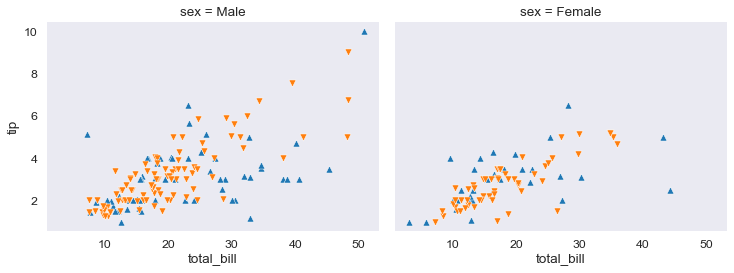

In [107]:
kws = dict(s=50, linewidth=.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, 
                        col='sex', 
                        hue='smoker', 
                        height=4, 
                        aspect=1.3,
                        hue_order=['Yes','No'],
                        hue_kws=dict(marker=['^','v'])
)

tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)